<a href="https://colab.research.google.com/github/Rsoni94/Coronavirus_Sentiment_Anlysis_Project/blob/main/Corona_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [43]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score

from warnings import filterwarnings
filterwarnings("ignore")


In [44]:
df=pd.read_csv("/content/drive/MyDrive/Corona Virus Stentiment Analysis Project/Coronavirus Tweets.csv",encoding="latin1")

In [45]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [46]:
df.shape

(41157, 6)

- There are 41157 rows and 6 columns in the dataset

In [47]:
duplicates = df[df.duplicated()]
len(duplicates)

0

- There are no duplicated values in data

In [48]:
df1=df.copy()

In [49]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

- There are 8590 null values in location column and all other columns has no null values

# EXPLORATORY DATA ANALYSIS

## Sentiments

In [50]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'Count')

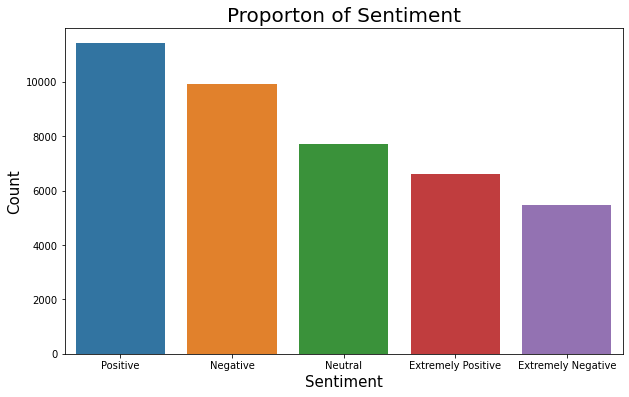

In [51]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Sentiment", y= 'count', data=sentiment_count)
ax.set_title('Proporton of Sentiment', fontsize=20)
ax.set_xlabel("Sentiment",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

- The above plot is showing the count value of different sentiments present in the dataset.
- The most common occuring sentiment is positive, followed by negative, neutral, extremely positive and least is extremely negative.

In [52]:
df.drop(df[df.Sentiment == "Neutral"].index, inplace = True)

df.Sentiment.unique()

array(['Positive', 'Extremely Negative', 'Negative', 'Extremely Positive'],
      dtype=object)

In [53]:
# Aggregate extremely positive/negative values
df = df.replace("Extremely Positive", "Positive")
df = df.replace("Extremely Negative", "Negative")

df.Sentiment.unique()

array(['Positive', 'Negative'], dtype=object)

<AxesSubplot:xlabel='Sentiment'>

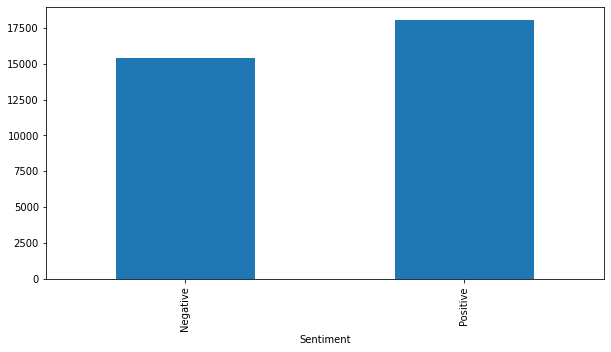

In [54]:
counts = df.groupby("Sentiment")["Sentiment"].agg("count")
fig, ax = plt.subplots(figsize=(10,5))

counts.plot.bar()

## Location

In [55]:
df.Location.value_counts().head(15)

London                     435
United States              416
London, England            413
Washington, DC             317
New York, NY               302
United Kingdom             286
Los Angeles, CA            218
India                      216
UK                         187
USA                        178
Australia                  175
England, United Kingdom    159
Canada                     142
Chicago, IL                136
Global                     132
Name: Location, dtype: int64

In [56]:
df.Location.unique()

array(['UK', 'Vagabonds', nan, ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [57]:
# Describing the Location 
df.Location.describe()

count      26395
unique     10465
top       London
freq         435
Name: Location, dtype: object

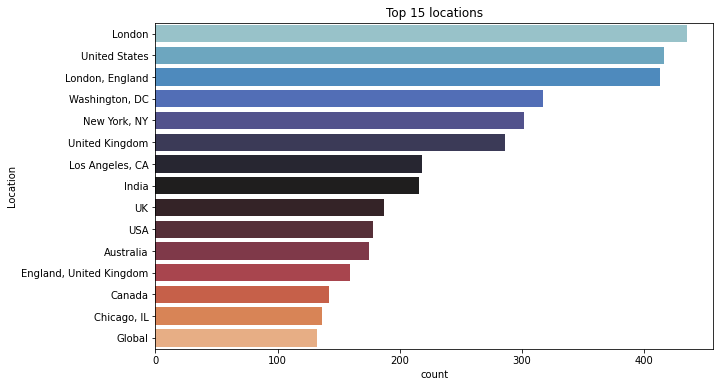

In [58]:
# Plot No- 2
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(10,6))
sns.countplot(y=df.Location, order = df.Location.value_counts().iloc[:15].index, palette ='icefire')
plt.title('Top 15 locations')
plt.show()

### The above count plot shows the top 15 locations in the dataset.
### Plot shows the London to be the maximum among all the different locations.
### Second place is of United States and India ranks at 8th place.

# Relation between OriginalTweet and TweetAt Column

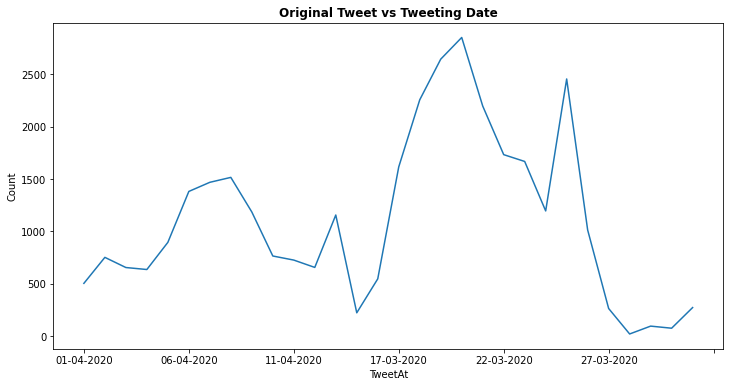

In [59]:
 # Plot No - 18
plt.figure(figsize=(12,6))
grp_tweetAt=df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.ylabel('Count')
plt.title('Original Tweet vs Tweeting Date', fontweight='bold')
plt.show()

In [60]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive


# FEATURE ENGINEERING AND TEXT CLEANING

In [61]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [62]:
df['tweet_clean'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet_clean
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,"Me, ready to go at supermarket during the #COV..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...


In [63]:
df['tweet_clean'] = df['tweet_clean'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet_clean
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,"Me, ready to go at supermarket during the #COV..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...


In [64]:
# count number of words per headline. strip whitespaces at the beginning/end of the sentence 
# and tokenize by whitespace
df_select = df[["OriginalTweet", "Sentiment","tweet_clean"]]
df_select["word_count"] = df_select["OriginalTweet"].apply(lambda x: len(x.strip().split(" ")))
df_select.head()


,OriginalTweet,Sentiment,tweet_clean,word_count
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,14
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,40
4,"Me, ready to go at supermarket during the #COV...",Negative,"Me, ready to go at supermarket during the #COV...",38
5,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...,36


In [65]:
df_select["word_count"].describe()

count    33444.000000
mean        31.979398
std         11.044458
min          1.000000
25%         24.000000
50%         33.000000
75%         41.000000
max        127.000000
Name: word_count, dtype: float64

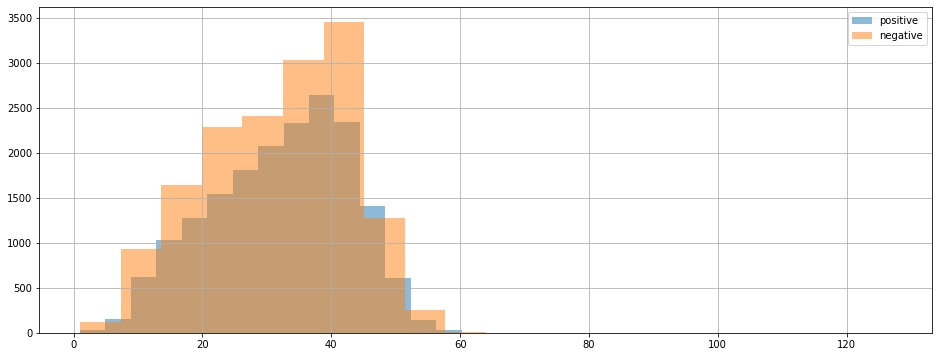

In [66]:
pos = df_select[df_select.Sentiment == "Positive"].word_count
neg =  df_select[df_select.Sentiment == "Negative"].word_count
plt.figure(figsize=(16,6))
plt.grid()


plt.hist(pos, bins = 20, alpha = 0.5, label='positive')
plt.hist(neg, bins = 20, alpha = 0.5, label='negative')
plt.legend(loc='upper right')
plt.show()

In [67]:
df_select

,OriginalTweet,Sentiment,tweet_clean,word_count
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,14
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,40
4,"Me, ready to go at supermarket during the #COV...",Negative,"Me, ready to go at supermarket during the #COV...",38
5,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...,36
...,...,...,...,...
41150,I never that weÂd be in a situation &amp; wor...,Positive,I never that weÂd be in a situation &amp; wor...,34
41151,@MrSilverScott you are definitely my man. I fe...,Positive,you are definitely my man. I feel like this f...,48
41153,Response to complaint not provided citing COVI...,Negative,Response to complaint not provided citing COVI...,23
41154,You know itÂs getting tough when @KameronWild...,Positive,You know itÂs getting tough when is rationi...,19


In [68]:
# save dataset
df_select.to_csv("./df_data.csv",index = False, encoding = "utf-8")

In [69]:
df = pd.read_csv("./df_data.csv")

In [70]:
df

,OriginalTweet,Sentiment,tweet_clean,word_count
0,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,38
1,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,14
2,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,40
3,"Me, ready to go at supermarket during the #COV...",Negative,"Me, ready to go at supermarket during the #COV...",38
4,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...,36
...,...,...,...,...
33439,I never that weÂd be in a situation &amp; wor...,Positive,I never that weÂd be in a situation &amp; wor...,34
33440,@MrSilverScott you are definitely my man. I fe...,Positive,you are definitely my man. I feel like this f...,48
33441,Response to complaint not provided citing COVI...,Negative,Response to complaint not provided citing COVI...,23
33442,You know itÂs getting tough when @KameronWild...,Positive,You know itÂs getting tough when is rationi...,19


In [71]:
text = df.OriginalTweet.iloc[4]
text

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [72]:
text = df.tweet_clean.iloc[4]
text

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods,  reports '

In [73]:
def preprocessor(text):
    # convert to lowercase, susbstitute non alphanumerical characters with whitespaces
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [74]:
# preprocess entire corpus
df['tweet_clean'] = df['OriginalTweet'].apply(preprocessor)
df.head()

,OriginalTweet,Sentiment,tweet_clean,word_count
0,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,38
1,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,14
2,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,40
3,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the covid...,38
4,As news of the regionÂs first confirmed COVID...,Positive,as news of the regionâ s first confirmed covid...,36


In [75]:
text = df.tweet_clean.iloc[4]
text

'as news of the regionâ s first confirmed covid 19 case came out of sullivan county last week people flocked to area stores to purchase cleaning supplies hand sanitizer food toilet paper and other goods tim_dodson reports https t co cfxch7a2lu'

In [76]:
df.drop(["OriginalTweet"], axis=1, inplace = True)

In [77]:
df

,Sentiment,tweet_clean,word_count
0,Positive,advice talk to your neighbours family to excha...,38
1,Positive,coronavirus australia woolworths to give elder...,14
2,Positive,my food stock is not the only one which is emp...,40
3,Negative,me ready to go at supermarket during the covid...,38
4,Positive,as news of the regionâ s first confirmed covid...,36
...,...,...,...
33439,Positive,i never that weâ d be in a situation amp world...,34
33440,Positive,mrsilverscott you are definitely my man i fee...,48
33441,Negative,response to complaint not provided citing covi...,23
33442,Positive,you know itâ s getting tough when kameronwilds...,19


In [78]:
df['tweet_clean'] = df['tweet_clean'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df.head()

,Sentiment,tweet_clean,word_count
0,Positive,advice talk to your neighbours family to excha...,38
1,Positive,coronavirus australia woolworths to give elder...,14
2,Positive,my food stock is not the only one which is emp...,40
3,Negative,me ready to go at supermarket during the covid...,38
4,Positive,as news of the regionâ s first confirmed covid...,36


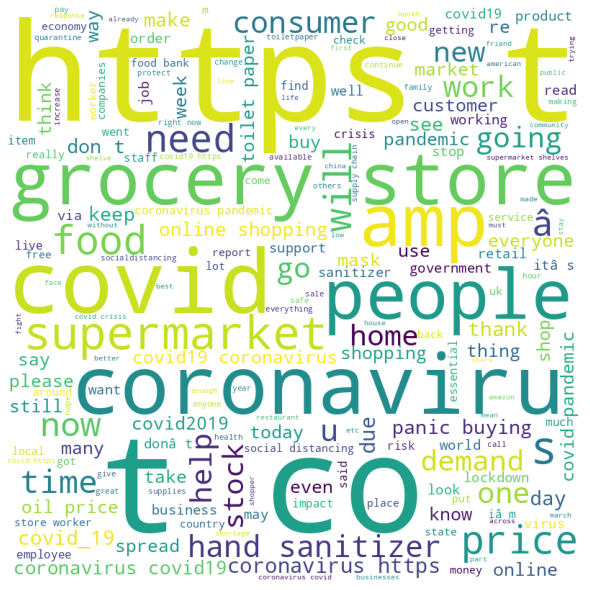

In [79]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.tweet_clean:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [80]:
def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stopwords]

  # joining the list of words with space separator 
  return " ".join(text)

In [81]:
df['tweet_clean'] = df['tweet_clean'].apply(remove_stopwords)

In [82]:
df.head()

,Sentiment,tweet_clean,word_count
0,Positive,advice talk neighbours family exchange phone n...,38
1,Positive,coronavirus australia woolworths give elderly ...,14
2,Positive,food stock one empty please don t panic will e...,40
3,Negative,ready go supermarket covid19 outbreak m parano...,38
4,Positive,news regionâ s first confirmed covid 19 case c...,36


In [83]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [84]:
df['tweet_clean']= df['tweet_clean'].apply(stemming)

In [85]:
df.head()

,Sentiment,tweet_clean,word_count
0,Positive,advic talk neighbour famili exchang phone numb...,38
1,Positive,coronavirus australia woolworth give elder dis...,14
2,Positive,food stock one empti pleas don t panic will en...,40
3,Negative,readi go supermarket covid19 outbreak m parano...,38
4,Positive,news regionâ s first confirm covid 19 case cam...,36


In [86]:
from collections import Counter
cnt = Counter()
for text in df.tweet_clean.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('t', 23297),
 ('co', 18541),
 ('https', 18448),
 ('coronavirus', 14325),
 ('19', 10416),
 ('covid', 10035),
 ('price', 7740),
 ('s', 7183),
 ('store', 6684),
 ('food', 6621)]

In [87]:
df['Sentiment']=df['Sentiment'].replace("Positive", 1)
df['Sentiment']=df['Sentiment'].replace("Negative", 0)

In [88]:
df

,Sentiment,tweet_clean,word_count
0,1,advic talk neighbour famili exchang phone numb...,38
1,1,coronavirus australia woolworth give elder dis...,14
2,1,food stock one empti pleas don t panic will en...,40
3,0,readi go supermarket covid19 outbreak m parano...,38
4,1,news regionâ s first confirm covid 19 case cam...,36
...,...,...,...
33439,1,never weâ d situat amp world go supermarket pi...,34
33440,1,mrsilverscott definit man feel fall need honor...,48
33441,0,respons complaint provid cite covid 19 relat d...,23
33442,1,know itâ s get tough kameronwild ration toilet...,19


# Train-Test Split

In [89]:
## defining Independent variable
X = df.tweet_clean

## defining dependent variable
y = df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26755,), (26755,), (6689,), (6689,))

# MODEL 1-LOGISTIC REGRESSION

In [90]:
from pylab import rcParams


plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative','Positive']

In [91]:
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [92]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',LR)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [93]:
## model prediction
y_pred = model.predict(X_test)

In [94]:
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))
print(classification_report(y_pred,y_test))

Accuracy : 0.8502018238899686
Precision : 0.8507837115255407
Recall : 0.8502018238899686
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2992
           1       0.87      0.85      0.86      3697

    accuracy                           0.85      6689
   macro avg       0.85      0.85      0.85      6689
weighted avg       0.85      0.85      0.85      6689



# MODEL-2 RANDOM FOREST CLASSIFIER

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model2 = Pipeline([('vectorizer',tvec),('classifier',rf)])
model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [96]:
y_pred_rf = model2.predict(X_test)

In [97]:
print('Accuracy :' ,accuracy_score(y_pred_rf,y_test))
print('Precision :', precision_score(y_pred_rf,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_rf,y_test, average='weighted'))
print(classification_report(y_pred_rf,y_test))

Accuracy : 0.8120795335625655
Precision : 0.8136587452617949
Recall : 0.8120795335625655
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2929
           1       0.85      0.81      0.83      3760

    accuracy                           0.81      6689
   macro avg       0.81      0.81      0.81      6689
weighted avg       0.81      0.81      0.81      6689



# MODEL-3 STOCHATIC GRADIENT DESCENT

In [98]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

model3 = Pipeline([('vectorizer',tvec),('classifier',sgd_clf)])
model3.fit(X_train,y_train)
y_pred_sgd = model3.predict(X_test)

In [99]:
print('Accuracy :' ,accuracy_score(y_pred_sgd,y_test))
print('Precision :', precision_score(y_pred_sgd,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_sgd,y_test, average='weighted'))
print(classification_report(y_pred_sgd,y_test))

Accuracy : 0.8461653460905965
Precision : 0.8467884755189035
Recall : 0.8461653460905965
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2989
           1       0.87      0.85      0.86      3700

    accuracy                           0.85      6689
   macro avg       0.84      0.85      0.84      6689
weighted avg       0.85      0.85      0.85      6689



# MODEL-4 SUPPORT VECTOR MACHINE

In [100]:
from sklearn.svm import SVC

svc = SVC()

model4 = Pipeline([('vectorizer',tvec),('classifier',svc)])
model4.fit(X_train,y_train)



Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [101]:
y_pred_svc = model4.predict(X_test)

In [102]:

print('Accuracy :' ,accuracy_score(y_pred_svc,y_test))
print('Precision :', precision_score(y_pred_svc,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_svc,y_test, average='weighted'))
print(classification_report(y_pred_svc,y_test))

Accuracy : 0.8545373000448497
Precision : 0.8548868411466071
Recall : 0.8545373000448497
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3015
           1       0.87      0.86      0.87      3674

    accuracy                           0.85      6689
   macro avg       0.85      0.85      0.85      6689
weighted avg       0.85      0.85      0.85      6689



# CONCLUSION

## On EDA
- Original dataset contains 6 columns and 41157 rows.
- 'Location’ column contains approx. 20.87% of Null values.
- The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.
- In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment". Hence, to avoid NaN values in "Location" columns we didnot used it further.
- There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive. So, we merged Extremely Positive with positive and Extremely Negative with Negative. And use encoding with value ‘0’ for negative,‘1’ for positive and we would drop neutral.
- Most of the tweets came from London followed by U.S.


## On Model Training
- At the end we conclude that in our project with 4 models namely Stochastic Gradient Descent, Random Forest Classifier,Support Vector Machine, Logistic Regression. 
- We are getting the highest test accuracy , Precision & Recall is about 85% with Support Vector Machine.